In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import cv2 

In [2]:
img = cv2.imread("bridge.jpg",0)

In [3]:
# This function applys FFT on an image, keeping only 1/4 largest coefficients and inverse it back
def fft_one_fourth_largest_inv(img):
    # Apply the fft in numpy on the image 
    img_fft = np.fft.fft2(img)
    # Apply the fftshift on previous result creating a center spectrum image 
    img_fft_center = np.fft.fftshift(img_fft)
    
    # Applying absolute on the coefficients in the spectrum image to compare the value
    # Sorting the coefficients form the smallest to the largest 
    img_fft_sorted_list = np.sort(np.abs(img_fft_center.ravel()))
    # Keeping the 1/4 largest coefficients and storing it in a list 
    save_img_fft_list = img_fft_sorted_list[round(3*len(img_fft_sorted_list)/4):]
    
    # Create the output image
    new_fft = np.copy(img_fft_center)
    # Looping over the output image one-pixel at a time, checking if it is the 1/4 largest coefficients
    # If not then replace it with 0
    for i in range(np.shape(img_fft_center)[0]):
        for j in range(np.shape(img_fft_center)[1]):
            # If the coefficient is larger than the minimum value in the 1/4 largest coefficients list 
            # than leave it as it is  
            if(np.abs(img_fft_center)[i][j] > min(save_img_fft_list)):
                new_fft[i][j]=img_fft_center[i][j]
            else:
                new_fft[i][j] = 0
    
    # Shift the center back 
    processed = np.fft.ifftshift(new_fft)
    # Apply the inverse transform 
    inv_img = np.abs(np.fft.ifft2(processed))
    
    return inv_img

### A. Perform the fourier transform, keeping only 1/4 largest coefficients, and perform inverse transform 

In [138]:
imageAl = fft_one_fourth_largest_inv(img)

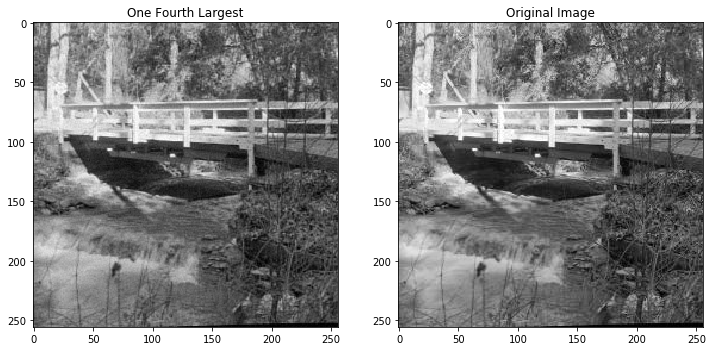

In [163]:
plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(imageAl, "gray"),plt.title("One Fourth Largest")
plt.subplot(122),plt.imshow(img, "gray"),plt.title("Original Image")
plt.savefig('Q1.1l.png', dpi=300, bbox_inches='tight')
plt.show()

### B. Divide the image into 256x16x16 blocks. Perform fouier transform on each block, keeping only 1/4 largest coefficients in each blocks, and take inverse transform.

In [147]:
# Create the output image 
imageBl = np.copy(img)

# Looping in stride 16 to perform fft_one_fourth_largest_inv on every 16x16 sections
for i in range(0,np.shape(img)[0],16):
    for j in range(0,np.shape(img)[1],16):
        img_div = img[i:i+16,j:j+16]
        imageBl[i:i+16,j:j+16] = fft_one_fourth_largest_inv(img_div)

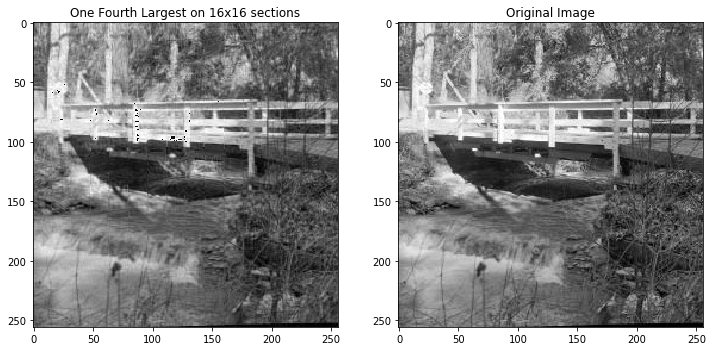

In [173]:
plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(imageBl, "gray"),plt.title("One Fourth Largest on 16x16 sections")
plt.subplot(122),plt.imshow(img, "gray"),plt.title("Original Image")
plt.savefig('Q1.2l.png', dpi=300, bbox_inches='tight')
plt.show()

### C. Reduce the size of the original image to 128x128 by sub-sampling or averaging. Perform Fouier Transform on the 128x128 image. Zero-pad the coefficient matrix to a 256x256 array. Then perform inverse transform.

In [44]:
# Downsize the image into 128x128
img_sub = cv2.pyrDown(img)

In [45]:
# Apply fft on it
img_sub_fft = np.fft.fft2(img_sub)
img_sub_fft = np.fft.fftshift(img_sub_fft)

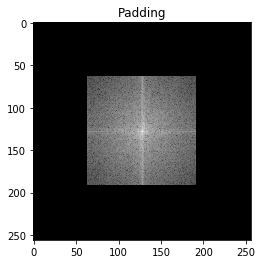

In [46]:
# Apply padding, restoring it to 256x256
img_pad = np.pad(img_sub_fft,((64,64),(64,64)))
plt.imshow(np.log(1+np.abs(img_pad)), "gray"),plt.title("Padding")
plt.savefig('Q1.3.padding.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
# Apply inverse transform
imageC = np.fft.ifftshift(img_pad)
imageC = 4*np.abs(np.fft.ifft(imageC))*255/50000

In [48]:
imageC 

array([[173.9202    , 182.72359161, 175.44      , ..., 101.63766104,
        110.5986    , 142.47056772],
       [  5.39375133,   5.49996189,   5.51585594, ...,  13.16678928,
         13.0339028 ,   8.49541967],
       [ 24.29578696,  27.56637085,  24.45776506, ...,   3.65000357,
          2.79374087,  12.63467771],
       ...,
       [ 11.71875878,  12.36929253,  12.33454881, ...,   8.19849345,
          9.25840267,  10.15220359],
       [ 24.29578696,  27.51748546,  24.45776506, ...,   3.84415349,
          2.79374087,  12.6529935 ],
       [  5.39375133,   5.57309536,   5.51585594, ...,  13.21054655,
         13.0339028 ,   8.43847485]])

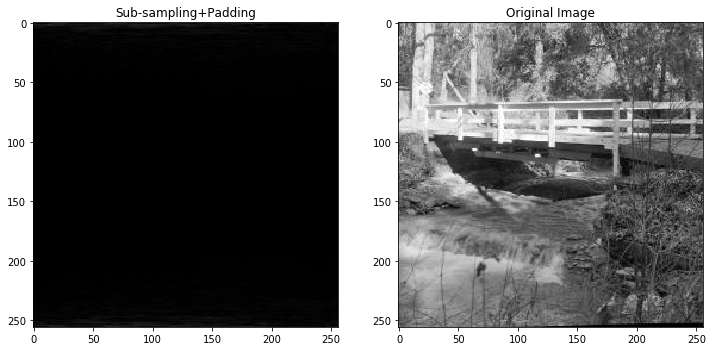

In [51]:
plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(imageC, "gray"),plt.title("Sub-sampling+Padding")
plt.subplot(122),plt.imshow(img, "gray"),plt.title("Original Image")
plt.savefig('Q1.3.png', dpi=300, bbox_inches='tight')
plt.show()

### The MSE of A,B,C to the origin

In [280]:
def MSE(origin,processed):
    mse = 0
    for i in range(np.shape(origin)[0]):
        for j in range(np.shape(origin)[1]):
            mse = mse + (int(origin[i,j])-int(processed[i,j]))**2
    mse = mse/((np.shape(origin)[0])*(np.shape(origin)[1]))
    return mse

In [281]:
imgAi_img_mse = MSE(img,imageAi)
imgAl_img_mse = MSE(img,imageAl)
imgBi_img_mse = MSE(img,imageBi)
imgBl_img_mse = MSE(img,imageBl)
imgC_img_mse = MSE(img,imageC)
print("\n",
      "imgAl_img_mse:",imgAl_img_mse,"\n",
      "imgBl_img_mse:",imgBl_img_mse,"\n",
      "imgC_img_mse:",imgC_img_mse,"\n",)


 imgAl_img_mse: 29.515792846679688 
 imgBl_img_mse: 146.7691192626953 
 imgC_img_mse: 239633.28491210938 



### Apdaptive medium filter 

In [34]:
# Adaptive median filter 
def Amf(img,x,y,max_size):
    # Start the filter size with the minimun 3X3
    size = 3
    
    # Lopping so the filter can be updated
    while 1:
        # l is the floor of the half of the size
        l = int(np.floor(size/2))
        
        # Padding the image for the convolution 
        img = np.pad(img,((l,l),(l,l)))
        
        # Shifting the pts because of the padding 
        x = x+l
        y = y+l
        
        # Create the list that will store all the value in the filter
        Z = []
        # Looping the filter from (x-l,y-l) to (x+l,y+l) and store the values in Z
        for i in range(-l,l+1):
            for j in range(-l,l+1):
                Z.append(img[x+i,y+j])
        
        # Following the AMF process
        A1 = np.median(Z)-min(Z)
        A2 = np.median(Z)-max(Z)
        if(A1>0 and A2<0):
            B1 = int(img[x,y])-min(Z)
            B2 = int(img[x,y])-max(Z)
            if(B1>0 and B2<0):
                return img[x,y]
            else:
                return np.median(Z)
        else:
            if(size < max_size):
                size += 2
            else:
                return img[x,y]

In [35]:
# Import the image 
img2 = cv2.imread('fig0514(a).jpg',0)

In [36]:
# Create the output image 
img2_amf = np.copy(img2)

# Convolute the AMF on the image 
for i in range(np.shape(img2)[0]):
    for j in range(np.shape(img2)[1]):
        img2_amf[i,j] = Amf(img2,i,j,7)

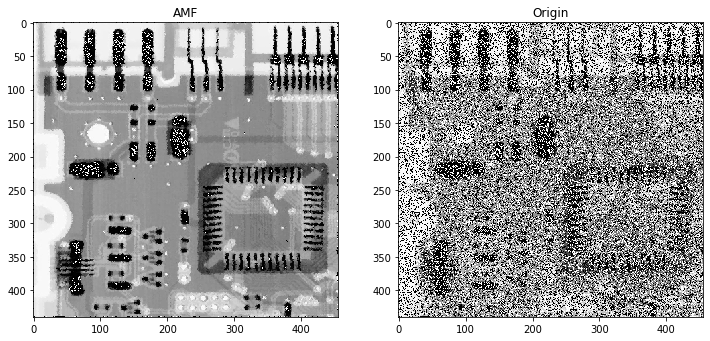

In [172]:
plt.figure(figsize=(12,10))
plt.subplot(121),plt.imshow(img2_amf, "gray"),plt.title("AMF")
plt.subplot(122),plt.imshow(img2, "gray"),plt.title("Origin")
plt.savefig('Q2.png', dpi=300, bbox_inches='tight')
plt.show()

### Limiting effect of Gaussian filter 

In [283]:
np.shape(img[:2])

(2, 256)

In [39]:
# Create a distance function 
def distance(point1,point2):
    return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

# The GLPF with the input sigma and the image shape
def gaussianLP(D0,imgShape):
    # Create the output filter
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    
    # Finding the center of the image 
    center = (rows/2,cols/2)
    
    # Looping through the filter applying the gaussian function
    for x in range(cols):
        for y in range(rows):
            base[y,x] = np.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

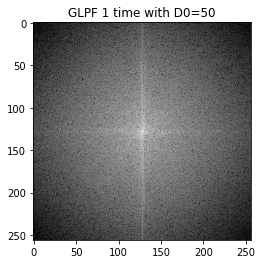

In [194]:
img = cv2.imread("bridge.jpg", 0)
# Set D0=50 to start with
original = np.fft.fft2(img)
center = np.fft.fftshift(original)
LowPassCenter = center * gaussianLP(50,img.shape)
GLPF1 = np.copy(LowPassCenter)
plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"),plt.title("GLPF 1 time with D0=50")
plt.savefig('Q3.1.1.png', dpi=300, bbox_inches='tight')
plt.show()

In [210]:
center = np.fft.fftshift(original)
LowPassCenter = center * gaussianLP(50,img.shape)
i = 1
while(i<4):
    LowPassCenter = LowPassCenter * gaussianLP(50,img.shape)
    i+=1
GLPF4 = np.copy(LowPassCenter)

In [212]:
center = np.fft.fftshift(original)
LowPassCenter = center * gaussianLP(50,img.shape)
i = 1
while(i<9):
    LowPassCenter = LowPassCenter * gaussianLP(50,img.shape)
    i+=1
GLPF9 = np.copy(LowPassCenter)

In [214]:
center = np.fft.fftshift(original)
LowPassCenter = center * gaussianLP(50,img.shape)
i = 1
while(i<16):
    LowPassCenter = LowPassCenter * gaussianLP(50,img.shape)
    i+=1
GLPF16 = np.copy(LowPassCenter)

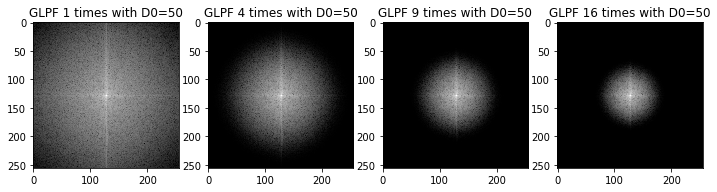

In [216]:
plt.figure(figsize = (12,10))
plt.subplot(141),plt.imshow(np.log(1+np.abs(GLPF1)), "gray"),plt.title("GLPF 1 times with D0=50")
plt.subplot(142),plt.imshow(np.log(1+np.abs(GLPF4)), "gray"),plt.title("GLPF 4 times with D0=50")
plt.subplot(143),plt.imshow(np.log(1+np.abs(GLPF9)), "gray"),plt.title("GLPF 9 times with D0=50")
plt.subplot(144),plt.imshow(np.log(1+np.abs(GLPF16)), "gray"),plt.title("GLPF 16 times with D0=50")
plt.savefig('Q3.1.compare.png', dpi=300, bbox_inches='tight')
plt.show()

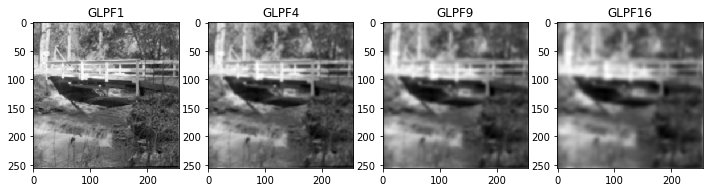

In [233]:
GLPF1s = np.fft.ifftshift(GLPF1)
GLPF4s = np.fft.ifftshift(GLPF4)
GLPF9s = np.fft.ifftshift(GLPF9)
GLPF16s = np.fft.ifftshift(GLPF16)
GLPF1i = np.abs(np.fft.ifft2(GLPF1s))
GLPF4i = np.abs(np.fft.ifft2(GLPF4s))
GLPF9i = np.abs(np.fft.ifft2(GLPF9s))
GLPF16i = np.abs(np.fft.ifft2(GLPF16s))
plt.figure(figsize = (12,10))
plt.subplot(141),plt.imshow(GLPF1i, "gray"),plt.title("GLPF1")
plt.subplot(142),plt.imshow(GLPF4i, "gray"),plt.title("GLPF4")
plt.subplot(143),plt.imshow(GLPF9i, "gray"),plt.title("GLPF9")
plt.subplot(144),plt.imshow(GLPF16i, "gray"),plt.title("GLPF16")
plt.savefig('Q3.1.newimg.compare.png', dpi=300, bbox_inches='tight')
plt.show()

In [218]:
def D0toD1(D0,n):
    D1 = np.sqrt(n*(D0**2))
    return D1

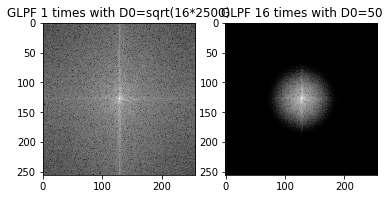

In [219]:
img = cv2.imread("bridge.jpg", 0)
D0 = 50
D1 = D0toD1(D0,16)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)
LowPassCenter = center * gaussianLP(D1,img.shape)
GLPFD116 = np.copy(LowPassCenter)
plt.subplot(121),plt.imshow(np.log(1+np.abs(GLPFD116)), "gray"),plt.title("GLPF 1 times with D0=sqrt(16*2500)")
plt.subplot(122),plt.imshow(np.log(1+np.abs(GLPF16)), "gray"),plt.title("GLPF 16 times with D0=50")
plt.savefig('Q3.1.newimg.compare.png', dpi=300, bbox_inches='tight')
plt.show()

### Limiting effect of Median filter 

In [42]:
def median_filter(img,size):
    img_out = np.copy(img)
    img_med = np.copy(img) 
    l = np.int(np.floor(size/2))
    img_med = np.pad(img_med,((l,l),(l,l)))
    for ii in range(np.shape(img)[0]):
        for jj in range(np.shape(img)[1]):
            Z = []
            for i in range(-l,l+1):
                for j in range(-l,l+1):
                    Z.append(img_med[ii+l+i,jj+l+j])
            img_out[ii,jj] = np.median(Z)
    return img_out

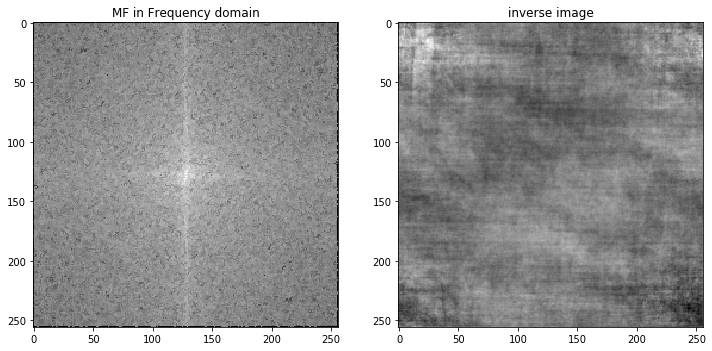

In [227]:
img = cv2.imread("bridge.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)
center = median_filter(center,3)
MF1 = np.copy(center)
processed= np.fft.ifftshift(center)
processed = np.real(np.fft.ifft2(processed))
plt.figure(figsize = (12,10))
plt.subplot(122),plt.imshow(processed, "gray"),plt.title("inverse image")
plt.subplot(121),plt.imshow(np.log(1+np.abs(center)), "gray"),plt.title("MF in Frequency domain")
plt.savefig('Q3.2.compare.png', dpi=300, bbox_inches='tight')
plt.show()        

In [223]:
center = np.fft.fftshift(original)
center = center = median_filter(center,3)
i = 1
while(i<4):
    center = center = median_filter(center,3)
    i+=1
MF4 = np.copy(center)

In [229]:
center = np.fft.fftshift(original)
center = center = median_filter(center,3)
i = 1
while(i<9):
    center = center = median_filter(center,3)
    i+=1
MF9 = np.copy(center)

In [230]:
center = np.fft.fftshift(original)
center = center = median_filter(center,3)
i = 1
while(i<16):
    center = center = median_filter(center,3)
    i+=1
MF16 = np.copy(center)

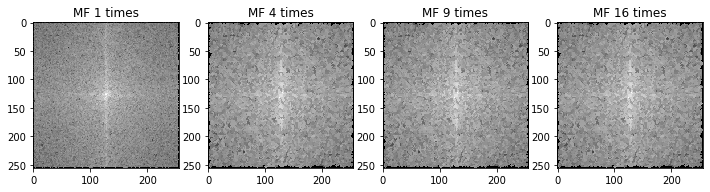

In [235]:
plt.figure(figsize = (12,10))
plt.subplot(141),plt.imshow(np.log(1+np.abs(MF1)), "gray"),plt.title("MF 1 times")
plt.subplot(142),plt.imshow(np.log(1+np.abs(MF4)), "gray"),plt.title("MF 4 times")
plt.subplot(143),plt.imshow(np.log(1+np.abs(MF9)), "gray"),plt.title("MF 9 times")
plt.subplot(144),plt.imshow(np.log(1+np.abs(MF16)), "gray"),plt.title("MF 16 times")
plt.savefig('Q3.2.MF.compare.png', dpi=300, bbox_inches='tight')
plt.show()

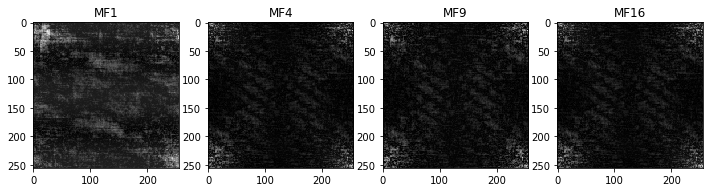

In [234]:
MF1s = np.fft.ifftshift(MF1)
MF4s = np.fft.ifftshift(MF4)
MF9s = np.fft.ifftshift(MF9)
MF16s = np.fft.ifftshift(MF16)
MF1i = np.abs(np.fft.ifft2(MF1s))
MF4i = np.abs(np.fft.ifft2(MF4s))
MF9i = np.abs(np.fft.ifft2(MF9s))
MF16i = np.abs(np.fft.ifft2(MF16s))
plt.figure(figsize = (12,10))
plt.subplot(141),plt.imshow(MF1i, "gray"),plt.title("MF1")
plt.subplot(142),plt.imshow(MF4i, "gray"),plt.title("MF4")
plt.subplot(143),plt.imshow(MF9i, "gray"),plt.title("MF9")
plt.subplot(144),plt.imshow(MF16i, "gray"),plt.title("MF16")
plt.savefig('Q3.2.MFi.compare.png', dpi=300, bbox_inches='tight')
plt.show()